In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load complex-valued image
image_complex = np.load("./dataset/test/SLC_024_430_045L_minus_y_pola_V.npy")

# Convert to a single-channel magnitude image
magnitude = np.sqrt(image_complex[:, :, 0]**2 + image_complex[:, :, 1]**2)

# Apply the 2D Fast Fourier Transform (FFT)
fft_image_complex = np.fft.fft2(magnitude)  # Compute FFT
fft_shifted_complex = np.fft.fftshift(fft_image_complex)  # Shift zero-frequency component to the center

# Compute the magnitude spectrum for visualization
fft_magnitude_complex = np.abs(fft_shifted_complex)

# Log transform for better contrast (avoids bright spots dominating the image)
fft_magnitude_log_complex = np.log1p(fft_magnitude_complex)

# Load a test image
image_denoised = np.load("./train1/test/denoised_SLC_024_430_045L_minus_y_pola_V.npy")

# Compute 2D Fourier Transform
fft_image_denoised = np.fft.fft2(image_denoised)
fft_shifted_denoised = np.fft.fftshift(np.abs(fft_image_denoised))  # Shift for visualization

fft_magnitude_log_denoised = np.log1p(fft_shifted_denoised)

# Plot denoised and complex magnitude spectrum
plt.figure(figsize=(12, 6))
subplot = plt.subplot(1, 2, 1)
subplot.imshow(fft_magnitude_log_denoised, cmap="gray")
subplot.set_title("Denoised Image")
subplot.axis("off")

subplot = plt.subplot(1, 2, 2)
subplot.imshow(fft_magnitude_log_complex, cmap="gray")
subplot.set_title("Complex Image")
subplot.axis("off")

plt.show()



KeyboardInterrupt: 

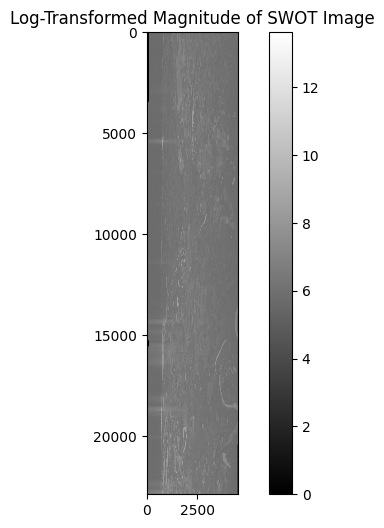

In [10]:
# Load complex-valued image
image_complex = np.load("./dataset/test/SLC_015_550_099L_plus_y_pola_V.npy")

# Convert to a single-channel magnitude image
magnitude = np.sqrt(image_complex[:, :, 0]**2 + image_complex[:, :, 1]**2)

magnitude_log = np.log1p(magnitude)  # Log transformation

plt.figure(figsize=(8, 6))
plt.imshow(magnitude_log, cmap="gray")
plt.colorbar()
plt.title("Log-Transformed Magnitude of SWOT Image")
plt.show()

Image shape: (22880, 4512)


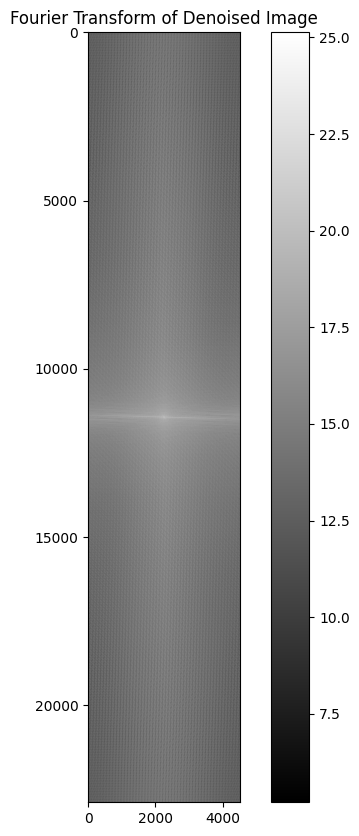

In [7]:
# Load a test image
image = np.load("./train1/test/denoised_SLC_015_550_099L_plus_y_pola_V.npy")
print("Image shape:", image.shape)

# Compute 2D Fourier Transform
fft_image = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(np.abs(fft_image))  # Shift for visualization

# Display the Fourier Transform (log scale for better visualization)
plt.figure(figsize=(8,10))
plt.imshow(np.log(1 + fft_shifted), cmap='gray')
plt.title("Fourier Transform of Denoised Image")
plt.colorbar()
plt.show()